## Lab 4 - Multiword expressions identification and extraction

In [1]:
import os
import math

from matplotlib import pyplot as plt
from spacy.lang.pl import Polish

nlp = Polish()

### Task 1

All tokens in one dict. Merging end of one file with the beggining of another shouldn't be a problem since all files end with non-letters.

In [2]:
bills_dir = "../bills/"
bills_files = os.listdir(bills_dir)

tokens_list = []

for file_path in [bills_dir + filename for filename in  bills_files]:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        tokens_list.extend([token.text.lower() for token in nlp(text)])  # keep in lowercase
        
print(tokens_list[:150])

['\n\n\n\n', 'dz', '.', 'u', '.', 'z', '1993', 'r', '.', 'nr', '129', ',', 'poz', '.', '599', '\n                                ', 'ustawa', '\n                        ', 'z', 'dnia', '9', 'grudnia', '1993', 'r', '.', '\n                                    \n             ', 'o', 'zmianie', 'ustawy', 'o', 'podatku', 'od', 'towarów', 'i', 'usług', '\n                        ', 'oraz', 'o', 'podatku', 'akcyzowym', '\n                                    \n                                    \n                                ', 'art', '.', '1', '.', '\n', 'w', 'ustawie', 'z', 'dnia', '8', 'stycznia', '1993', 'r', '.', 'o', 'podatku', 'od', 'towarów', 'i', 'usług', 'oraz', 'o', 'podatku', '\n', 'akcyzowym', '(', 'dz', '.', 'u', '.', 'nr', '11', ',', 'poz', '.', '50', 'i', 'nr', '28', ',', 'poz', '.', '127', ')', 'wprowadza', 'się', 'następujące', '\n', 'zmiany', ':', '\n ', '1', ')', 'w', 'art', '.', '3', ':', '\n    ', 'a', ')', 'dotychczasowa', 'treść', 'otrzymuje', 'oznaczenie', 'ust', '

### Task 2

Function to generate n-grams, also for Task 9.

In [3]:
def generate_ngram_count(tokens, n=2):
    
    ngram_dict = {}
    tokens_num = len(tokens)
    for i in range(tokens_num):
        
        if i == tokens_num - n:
            break
            
        ngram = tuple(tokens[i + j] for j in range(n))
        
        if ngram in ngram_dict:
            ngram_dict[ngram] += 1
        else:
            ngram_dict[ngram] = 1
            
    return ngram_dict

In [4]:
bigrams_count = generate_ngram_count(tokens_list)
print(list(bigrams_count.items())[:75])

[(('\n\n\n\n', 'dz'), 836), (('dz', '.'), 8933), (('.', 'u'), 8057), (('u', '.'), 8181), (('.', 'z'), 5049), (('z', '1993'), 512), (('1993', 'r'), 775), (('r', '.'), 33165), (('.', 'nr'), 20379), (('nr', '129'), 122), (('129', ','), 152), ((',', 'poz'), 39848), (('poz', '.'), 45455), (('.', '599'), 38), (('599', '\n                                '), 1), (('\n                                ', 'ustawa'), 58), (('ustawa', '\n                        '), 79), (('\n                        ', 'z'), 81), (('z', 'dnia'), 9037), (('dnia', '9'), 210), (('9', 'grudnia'), 6), (('grudnia', '1993'), 99), (('.', '\n                                    \n             '), 12), (('\n                                    \n             ', 'o'), 12), (('o', 'zmianie'), 1177), (('zmianie', 'ustawy'), 829), (('ustawy', 'o'), 1416), (('o', 'podatku'), 496), (('podatku', 'od'), 363), (('od', 'towarów'), 250), (('towarów', 'i'), 505), (('i', 'usług'), 528), (('usług', '\n                        '), 1), (('\n    

### Task 3

In [5]:
for key in list(bigrams_count.keys()):
    if any(not token.isalpha() for token in key):
        bigrams_count.pop(key)
        
print(list(bigrams_count.items())[:75])

[(('z', 'dnia'), 9037), (('o', 'zmianie'), 1177), (('zmianie', 'ustawy'), 829), (('ustawy', 'o'), 1416), (('o', 'podatku'), 496), (('podatku', 'od'), 363), (('od', 'towarów'), 250), (('towarów', 'i'), 505), (('i', 'usług'), 528), (('oraz', 'o'), 905), (('podatku', 'akcyzowym'), 52), (('w', 'ustawie'), 4797), (('ustawie', 'z'), 3637), (('usług', 'oraz'), 119), (('i', 'nr'), 7898), (('wprowadza', 'się'), 1744), (('się', 'następujące'), 1638), (('w', 'art'), 30300), (('dotychczasowa', 'treść'), 37), (('treść', 'otrzymuje'), 37), (('otrzymuje', 'oznaczenie'), 40), (('oznaczenie', 'ust'), 61), (('dodaje', 'się'), 7999), (('się', 'ust'), 3406), (('w', 'brzmieniu'), 6719), (('rada', 'ministrów'), 855), (('ministrów', 'może'), 143), (('może', 'określać'), 49), (('w', 'drodze'), 6632), (('drodze', 'rozporządzenia'), 3677), (('towary', 'i'), 19), (('i', 'usługi'), 26), (('z', 'wyjątkiem'), 1447), (('wyjątkiem', 'wyrobów'), 19), (('wyrobów', 'akcyzowych'), 421), (('akcyzowych', 'i'), 5), (('i', '

### Task 4

It is also needed to count occurences of each token separately, I assume the same filtering as for bigrams (since tokens with non-letters won't appear in the bigram).

In [6]:
# counting single tokens occurences
tokens_count = {}

for token in tokens_list:
    if not token.isalpha():
        continue
    
    if token in tokens_count:
        tokens_count[token] += 1
    else:
        tokens_count[token] = 1

# not distinct
tokens_num = len(tokens_count)
all_bigrams = sum(bigrams_count.values())

# PMI
bigrams_PMI = {}

for bigram, count in bigrams_count.items():
    # log2(P(x,y) / (P(x) * P(y)))
    bigrams_PMI[bigram] = math.log2((count / all_bigrams) / (tokens_count[bigram[0]]/tokens_num * tokens_count[bigram[1]]/tokens_num))

print(list(bigrams_PMI.items())[:50])

[(('z', 'dnia'), -7.051262836933078), (('o', 'zmianie'), -6.0789954777900865), (('zmianie', 'ustawy'), -4.280833874611061), (('ustawy', 'o'), -8.929332570296443), (('o', 'podatku'), -7.760972395832079), (('podatku', 'od'), -6.252653511173417), (('od', 'towarów'), -6.6913095012786385), (('towarów', 'i'), -8.105836824426667), (('i', 'usług'), -7.804596728160283), (('oraz', 'o'), -10.924857825757359), (('podatku', 'akcyzowym'), -1.5139534866313626), (('w', 'ustawie'), -7.536995335314894), (('ustawie', 'z'), -6.649520262952287), (('usług', 'oraz'), -8.529841695762249), (('i', 'nr'), -8.69372496950803), (('wprowadza', 'się'), -5.405248679603098), (('się', 'następujące'), -5.683393120098572), (('w', 'art'), -8.815248883318558), (('dotychczasowa', 'treść'), 0.9105051199907206), (('treść', 'otrzymuje'), -6.716809881374328), (('otrzymuje', 'oznaczenie'), -6.8296628644769095), (('oznaczenie', 'ust'), -8.661940727772189), (('dodaje', 'się'), -5.2882770672710295), (('się', 'ust'), -9.1853231299063

### Task 5

In [7]:
sorted_bigrams_PMI = sorted(list(bigrams_PMI.items()), key=lambda item: item[1], reverse=True)
print(sorted_bigrams_PMI[:10])

[(('kołowe', 'jednoosiowe'), 10.284487158451189), (('zbrojeń', 'żelbeto'), 10.284487158451189), (('prefabrykatów', 'wnętrzowe'), 10.284487158451189), (('gołe', 'aluminiowe'), 10.284487158451189), (('polistyrenu', 'spienionego'), 10.284487158451189), (('objaśnieniem', 'figur'), 10.284487158451189), (('wkładzie', 'wnoszonym'), 10.284487158451189), (('doktorem', 'habilitowanym'), 10.284487158451189), (('losy', 'loteryjne'), 10.284487158451189), (('ugaszone', 'zapałki'), 10.284487158451189)]


### Task 6

In [8]:
sorted_bigrams_PMI_5_occurences = [item for item in sorted_bigrams_PMI if bigrams_count[item[0]] >= 5]
print(sorted_bigrams_PMI_5_occurences[:10])

[(('świeckie', 'przygotowujące'), 7.962559063563826), (('klęskami', 'żywiołowymi'), 7.962559063563826), (('ręcznego', 'miotacza'), 7.962559063563826), (('stajnią', 'wyścigową'), 7.962559063563826), (('otworami', 'wiertniczymi'), 7.962559063563826), (('obcowania', 'płciowego'), 7.962559063563826), (('młyny', 'kulowe'), 7.962559063563826), (('młynki', 'młotkowe'), 7.962559063563826), (('zaszkodzić', 'wynikom'), 7.962559063563826), (('grzegorz', 'schetyna'), 7.962559063563826)]


### Task 7

Notation and formula from: http://tdunning.blogspot.com/2008/03/surprise-and-coincidence.html

In [9]:
# calculate each token's occurence considering position in bigram
# we need this because of bigrams that had only one correct word and were dropped in Task 2

first_tokens = {}
second_tokens = {}

for bigram, value in bigrams_count.items():

    if bigram[0] in first_tokens:
        first_tokens[bigram[0]] += value
    else:
        first_tokens[bigram[0]] = value
        
    if bigram[1] in second_tokens:
        second_tokens[bigram[1]] += value
    else:
        second_tokens[bigram[1]] = value

In [10]:
def H(k, N=all_bigrams):
    return sum([k_i / N * math.log(k_i / N + (k_i == 0)) for k_i in k])


bigrams_LLR = {}

for bigram, value in bigrams_count.items():
    k11 = value
    k12 = second_tokens[bigram[1]] - value
    k21 = first_tokens[bigram[0]] - value
    # all events = all (not distinct) bigrams
    k22 = all_bigrams - (k11 + k12 + k21)
    
    # 2 * N * ( H(k_default) - H(k_rows_summed) - H(k_cols_summed) )
    bigrams_LLR[bigram] = 2 * all_bigrams * (H([k11, k12, k21, k22]) - H([k11 + k12, k21 + k22]) - H([k11 + k21, k12 + k22]))

In [11]:
print(list(bigrams_LLR.items())[:10])

[(('z', 'dnia'), 47356.37327216402), (('o', 'zmianie'), 7833.916498372703), (('zmianie', 'ustawy'), 7606.280266198296), (('ustawy', 'o'), 5552.434940792553), (('o', 'podatku'), 1661.2751640566792), (('podatku', 'od'), 2056.4600990894223), (('od', 'towarów'), 1170.7462067792367), (('towarów', 'i'), 1964.426062256174), (('i', 'usług'), 1946.4532667389358), (('oraz', 'o'), 796.997403546518)]


### Task 8

In [12]:
sorted_bigrams_LLR = sorted(list(bigrams_LLR.items()), key=lambda item: item[1], reverse=True)
print(sorted_bigrams_LLR[:10])

[(('mowa', 'w'), 169817.26620140902), (('w', 'art'), 113929.34035619127), (('otrzymuje', 'brzmienie'), 113015.2200434798), (('których', 'mowa'), 107958.41561921076), (('o', 'których'), 84981.44722865104), (('w', 'ust'), 82456.33739974452), (('którym', 'mowa'), 70554.3085237375), (('dodaje', 'się'), 64186.193859288716), (('do', 'spraw'), 57828.57820693245), (('o', 'którym'), 55477.278996931745)]


### Task 9

In [13]:
trigrams_count = generate_ngram_count(tokens_list, 3)
print(list(trigrams_count.items())[:50])

[(('\n\n\n\n', 'dz', '.'), 836), (('dz', '.', 'u'), 8037), (('.', 'u', '.'), 8019), (('u', '.', 'z'), 4289), (('.', 'z', '1993'), 134), (('z', '1993', 'r'), 503), (('1993', 'r', '.'), 775), (('r', '.', 'nr'), 17010), (('.', 'nr', '129'), 47), (('nr', '129', ','), 121), (('129', ',', 'poz'), 116), ((',', 'poz', '.'), 39826), (('poz', '.', '599'), 33), (('.', '599', '\n                                '), 1), (('599', '\n                                ', 'ustawa'), 1), (('\n                                ', 'ustawa', '\n                        '), 11), (('ustawa', '\n                        ', 'z'), 79), (('\n                        ', 'z', 'dnia'), 81), (('z', 'dnia', '9'), 191), (('dnia', '9', 'grudnia'), 4), (('9', 'grudnia', '1993'), 2), (('grudnia', '1993', 'r'), 98), (('r', '.', '\n                                    \n             '), 12), (('.', '\n                                    \n             ', 'o'), 12), (('\n                                    \n             ', 'o', 'zm

In [14]:
for key in list(trigrams_count.keys()):
    if any(not token.isalpha() for token in key):
        trigrams_count.pop(key)
        
print(list(trigrams_count.items())[:50])

[(('o', 'zmianie', 'ustawy'), 750), (('zmianie', 'ustawy', 'o'), 614), (('ustawy', 'o', 'podatku'), 123), (('o', 'podatku', 'od'), 106), (('podatku', 'od', 'towarów'), 194), (('od', 'towarów', 'i'), 223), (('towarów', 'i', 'usług'), 393), (('oraz', 'o', 'podatku'), 46), (('o', 'podatku', 'akcyzowym'), 41), (('w', 'ustawie', 'z'), 3360), (('ustawie', 'z', 'dnia'), 3524), (('i', 'usług', 'oraz'), 93), (('usług', 'oraz', 'o'), 54), (('wprowadza', 'się', 'następujące'), 1488), (('dotychczasowa', 'treść', 'otrzymuje'), 37), (('treść', 'otrzymuje', 'oznaczenie'), 37), (('otrzymuje', 'oznaczenie', 'ust'), 16), (('dodaje', 'się', 'ust'), 2668), (('rada', 'ministrów', 'może'), 109), (('ministrów', 'może', 'określać'), 5), (('w', 'drodze', 'rozporządzenia'), 3379), (('towary', 'i', 'usługi'), 11), (('z', 'wyjątkiem', 'wyrobów'), 19), (('wyjątkiem', 'wyrobów', 'akcyzowych'), 6), (('wyrobów', 'akcyzowych', 'i'), 3), (('akcyzowych', 'i', 'wyrobów'), 1), (('z', 'metali', 'szlachetnych'), 15), (('do'

### Task 10

**PMI:**

In [15]:
all_trigrams = sum(trigrams_count.values())

trigrams_PMI = {}

for trigram, count in trigrams_count.items():
    # log2(P(x,y,z) / (P(x) * P(y) * P(z)))
    trigrams_PMI[trigram] = math.log2((count / all_trigrams) / (tokens_count[trigram[0]]/tokens_num * tokens_count[trigram[1]]/tokens_num * tokens_count[trigram[2]]/tokens_num))

print(list(trigrams_PMI.items())[:50])

[(('o', 'zmianie', 'ustawy'), -4.19038713618904), (('zmianie', 'ustawy', 'o'), -4.4790390762021035), (('ustawy', 'o', 'podatku'), -7.2338940396234666), (('o', 'podatku', 'od'), -7.793630550071439), (('podatku', 'od', 'towarów'), -1.836651368336864), (('od', 'towarów', 'i'), -7.091458800561203), (('towarów', 'i', 'usług'), -2.9106903066149545), (('oraz', 'o', 'podatku'), -10.00254027625418), (('o', 'podatku', 'akcyzowym'), -1.6219129556198424), (('w', 'ustawie', 'z'), -8.160696760137608), (('ustawie', 'z', 'dnia'), -4.6072895643277985), (('i', 'usług', 'oraz'), -9.120765562502944), (('usług', 'oraz', 'o'), -9.434843712372196), (('wprowadza', 'się', 'następujące'), -0.5609025602265871), (('dotychczasowa', 'treść', 'otrzymuje'), 3.8668907711616507), (('treść', 'otrzymuje', 'oznaczenie'), 0.3458400342606876), (('otrzymuje', 'oznaczenie', 'ust'), -7.636292414164146), (('dodaje', 'się', 'ust'), -6.3570395073962995), (('rada', 'ministrów', 'może'), -2.4977561842525815), (('ministrów', 'może',

In [16]:
sorted_trigrams_PMI = sorted(list(trigrams_PMI.items()), key=lambda item: item[1], reverse=True)
print(sorted_trigrams_PMI[:10])

[(('wniebowzięcia', 'najświętszej', 'maryi'), 26.51204400076189), (('najświętszej', 'maryi', 'panny'), 26.51204400076189), (('porejestrowe', 'doświadczalnictwo', 'odmianowe'), 26.51204400076189), (('world', 'jewish', 'restitution'), 26.51204400076189), (('jewish', 'restitution', 'organisation'), 26.51204400076189), (('wszywanie', 'zamków', 'błyskawicznych'), 26.51204400076189), (('mit', 'beschrankter', 'haftung'), 26.51204400076189), (('prosimy', 'uważnie', 'przeczytać'), 26.51204400076189), (('aegroti', 'suprema', 'lex'), 26.51204400076189), (('musa', 'textilis', 'nee'), 26.51204400076189)]


**PMI - min 5 occurences:**

In [17]:
sorted_trigrams_PMI_5_occurences = [item for item in sorted_trigrams_PMI if trigrams_count[item[0]] >= 5]
print(sorted_trigrams_PMI_5_occurences[:10])

[(('profilem', 'zaufanym', 'epuap'), 18.99568734705977), (('finałowego', 'turnieju', 'mistrzostw'), 18.615207069817295), (('przedwczesnego', 'wyrębu', 'drzewostanu'), 18.44165467287049), (('potwierdzonym', 'profilem', 'zaufanym'), 18.32266866967342), (('piłce', 'nożnej', 'uefa'), 18.264116487318304), (('cienką', 'sierścią', 'zwierzęcą'), 17.91510885837466), (('szybkiemu', 'postępowi', 'technicznemu'), 17.850265902989904), (('turnieju', 'mistrzostw', 'europy'), 17.849672323454318), (('grożącą', 'jemu', 'samemu'), 17.608764658705752), (('wypalonym', 'paliwem', 'jądrowym'), 17.534764077261976)]


**LLR:**  
Will be calculated similarly to the bigrams, but pairs (first_token, second_token) and (second_token, third_token) will now be counted instead of tokens.

In [18]:
first_bigrams = {}
second_bigrams = {}

for trigram, value in trigrams_count.items():
    
    first, second = (trigram[0], trigram[1]), (trigram[1], trigram[2])
    if first in first_bigrams:
        first_bigrams[first] += value
    else:
        first_bigrams[first] = value
        
    if second in second_bigrams:
        second_bigrams[second] += value
    else:
        second_bigrams[second] = value

In [19]:
trigrams_LLR = {}

for trigram, value in trigrams_count.items():
    k11 = value
    k12 = second_bigrams[(trigram[1], trigram[2])] - value
    k21 = first_bigrams[(trigram[0], trigram[1])] - value
    # all events = all (not distinct) trigrams
    k22 = all_trigrams - (k11 + k12 + k21)
    
    # 2 * N * ( H(k_default) - H(k_rows_summed) - H(k_cols_summed) )
    # same H function
    trigrams_LLR[trigram] = 2 * all_trigrams * (H([k11, k12, k21, k22], all_trigrams) - H([k11 + k12, k21 + k22], all_trigrams) - H([k11 + k21, k12 + k22], all_trigrams))

In [20]:
sorted_trigrams_LLR = sorted(list(trigrams_LLR.items()), key=lambda item: item[1], reverse=True)

### Task 11

#### BIGRAMS

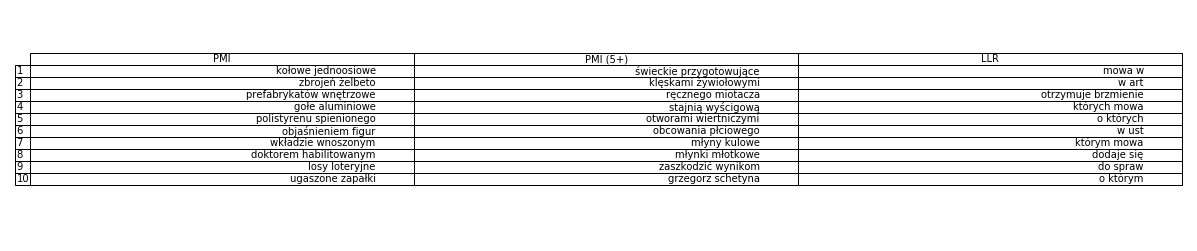

In [21]:
data = list(map(list, zip(*[sorted_bigrams_PMI[:10], sorted_bigrams_PMI_5_occurences[:10], sorted_bigrams_LLR[:10]])))
data = [[" ".join(data[row][col][0]) for col in range(len(data[row]))] for row in range(len(data))]

fig = plt.figure(figsize=(16,3))
ax = fig.add_axes([1, 1, 1, 1])
ax.axis('off')
ax.table(cellText=data, rowLabels=range(1, 11), colLabels=["PMI", "PMI (5+)", "LLR"], loc='center')
plt.show()

#### TRIGRAMS

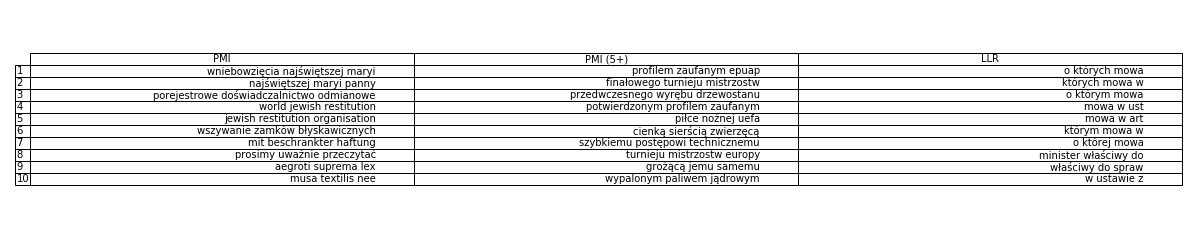

In [22]:
data = list(map(list, zip(*[sorted_trigrams_PMI[:10], sorted_trigrams_PMI_5_occurences[:10], sorted_trigrams_LLR[:10]])))
data = [[" ".join(data[row][col][0]) for col in range(len(data[row]))] for row in range(len(data))]

fig = plt.figure(figsize=(16,3))
ax = fig.add_axes([1, 1, 1, 1])
ax.axis('off')
ax.table(cellText=data, rowLabels=range(1, 11), colLabels=["PMI", "PMI (5+)", "LLR"], loc='center')
plt.show()

### Task 12

#### Why do we have to filter the bigrams, rather than the token sequence?  
If we'd filtered the token sequence we'd get more bigrams but some of them would be totally unrelated, e.g.: tokens from different sentences (because we remove full stop).  
By filtering bigrams we are preserving some context.
#### Which measure (PMI, PMI with filtering, LLR) works better for the bigrams and which for the trigrams?
I'd say that PMI with filtering returned the most interesting results for both versions of the n-gram, since LLR in both cases returned basically the same results and PMI without filtering found expressions which tokens appeared only a few times in the whole text (e.g. latin, german or english expressions).
#### What types of expressions are discovered by the methods.
Nearly all results of LLR contain conjuntions and/or pronouns.  
PMI without filtering found expressions that were just very rare in examined bills.  
PMI with filtering returned the most diverse multiword expressions which we sometimes names ("Grzegorz Schetyna") or contains some proper nouns ("piłce nożnej uefa").
#### Can you devise a different type of filtering that would yield better results?
Maybe removing short tokens, so that we get less results that are totally generic like: "którym mowa w" or "o którym".  
Maybe even blacklist and remove pronouns (and conjuctions), this way we'd have more expressions and it would be easier if we were to deduct text's field (like: biology, law etc.).